In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./pokemon.csv")

In [4]:
# 计算出每个特征有多少百分比是缺失的
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': percent_missing
})
# 查看Top10缺失的
missing_value_df.sort_values(by='percent_missing', ascending=False).head(10)

,column_name,percent_missing
type2,type2,47.940075
percentage_male,percentage_male,12.234707
weight_kg,weight_kg,2.496879
height_m,height_m,2.496879
name,name,0.000000
capture_rate,capture_rate,0.000000
classfication,classfication,0.000000
defense,defense,0.000000
experience_growth,experience_growth,0.000000
hp,hp,0.000000


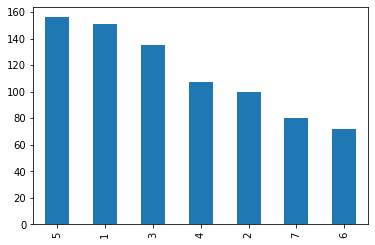

In [5]:
# 查看各代口袋妖怪的数量
df['generation'].value_counts().plot.bar()

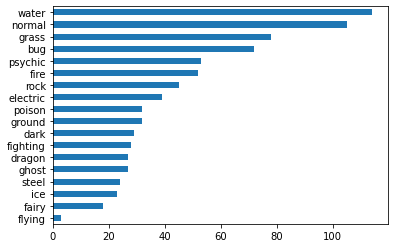

In [6]:
# 查看每个系口袋妖怪的数量
df['type1'].value_counts().sort_values(ascending=True).plot.barh()

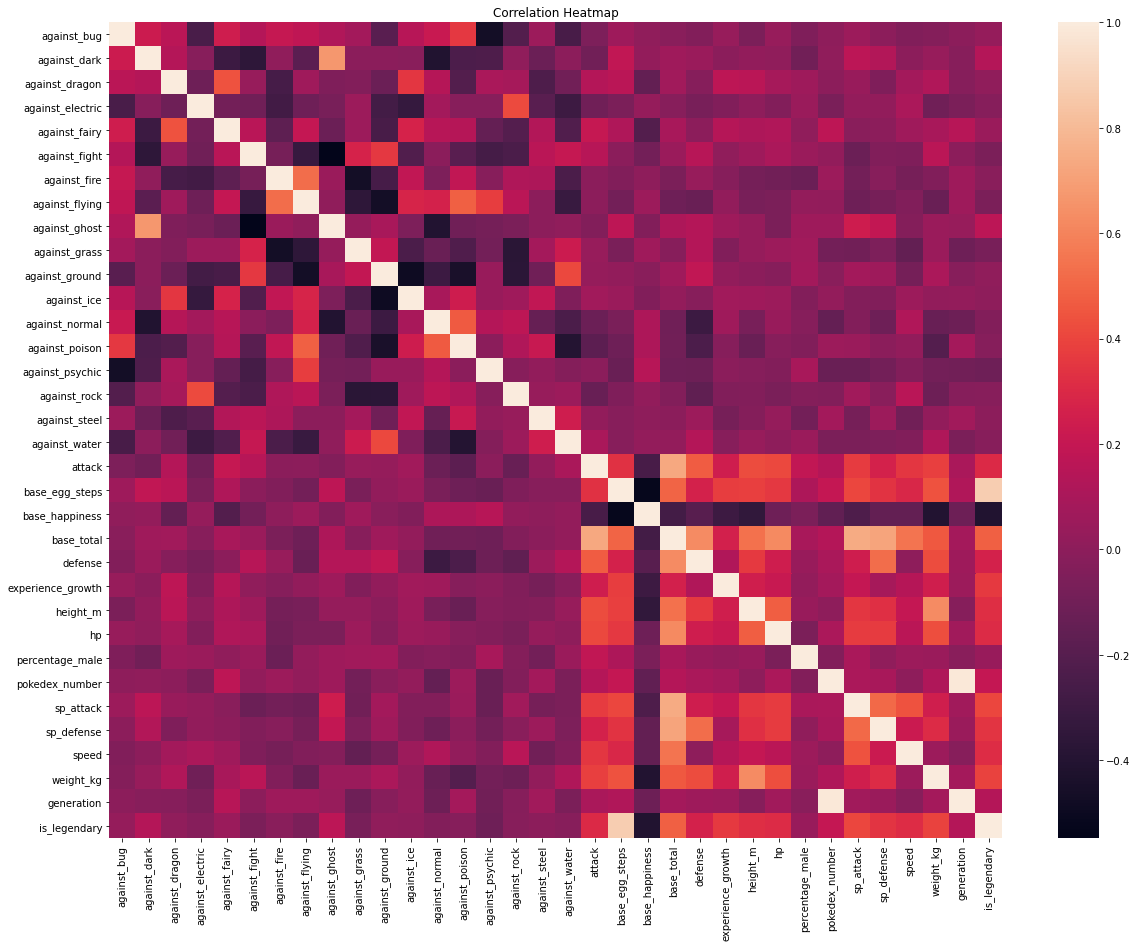

In [7]:
# 相关性热力图分析
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

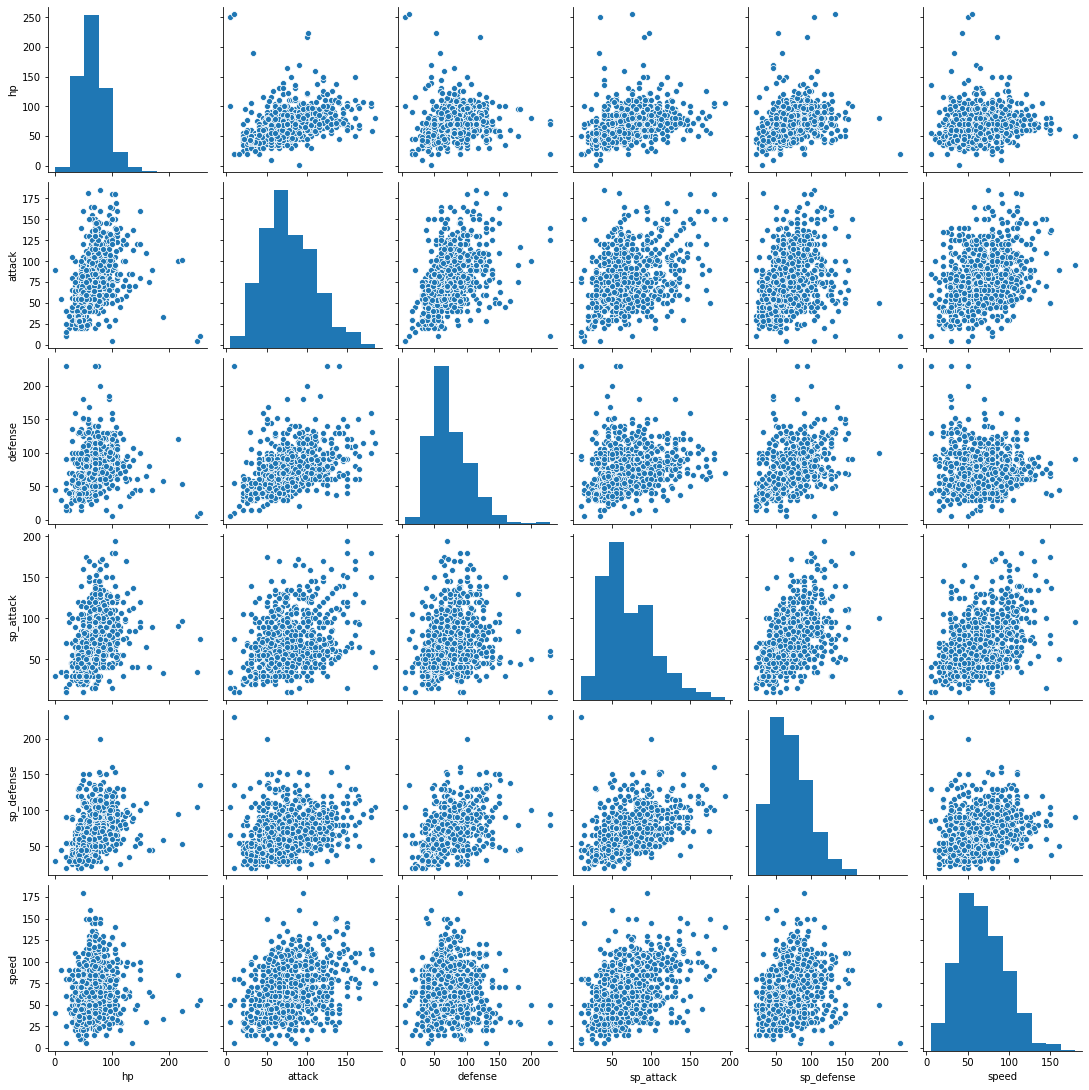

In [8]:
interested = ['hp','attack','defense','sp_attack','sp_defense','speed']
sns.pairplot(df[interested])

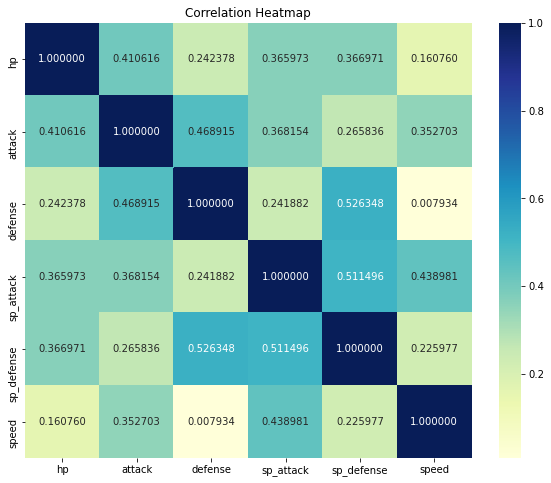

In [9]:
# 通过相关性分析heatmap分析五个基础属性
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df[interested].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt="f",cmap="YlGnBu")

In [10]:
for c in interested:
    df[c] = df[c].astype(float)
df = df.assign(total_stats = df[interested].sum(axis=1)) 

Text(0, 0.5, 'Frequency')

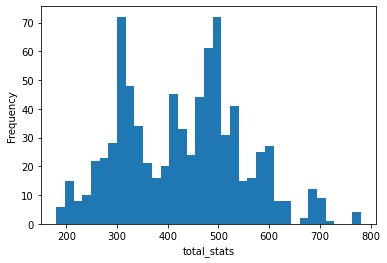

In [11]:
# 种族值分布
total_stats = df.total_stats
plt.hist(total_stats,bins=35)
plt.xlabel('total_stats')
plt.ylabel('Frequency')

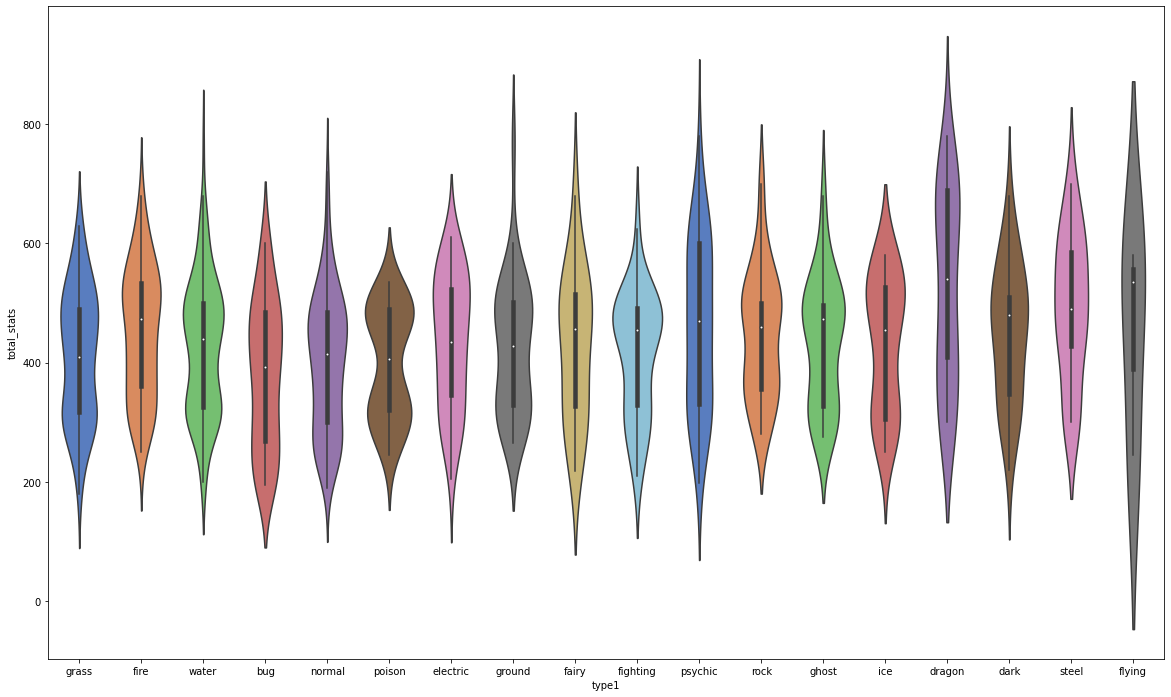

In [12]:
# 不同属性的种族值分布
plt.subplots(figsize=(20,12))
ax = sns.violinplot(x="type1", y="total_stats",
                    data=df, palette="muted")

In [13]:
df[(df.total_stats >= 570) & (df.is_legendary == 0)]['name'].head(10)

2        Venusaur
5       Charizard
8       Blastoise
17        Pidgeot
64       Alakazam
79        Slowbro
93         Gengar
114    Kangaskhan
126        Pinsir
129      Gyarados
Name: name, dtype: object